# Quantum Fourier Transform

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
import numpy as np
import qiskit
from qiskit import visualization, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
%matplotlib inline
from math import pi
from Circuits import getBloch, stateGenerator, getMeasure, makeCirc, makeCirc2

In [3]:
backend = Aer.get_backend('statevector_simulator')

In [4]:
# code from qiskit documentation
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

1111


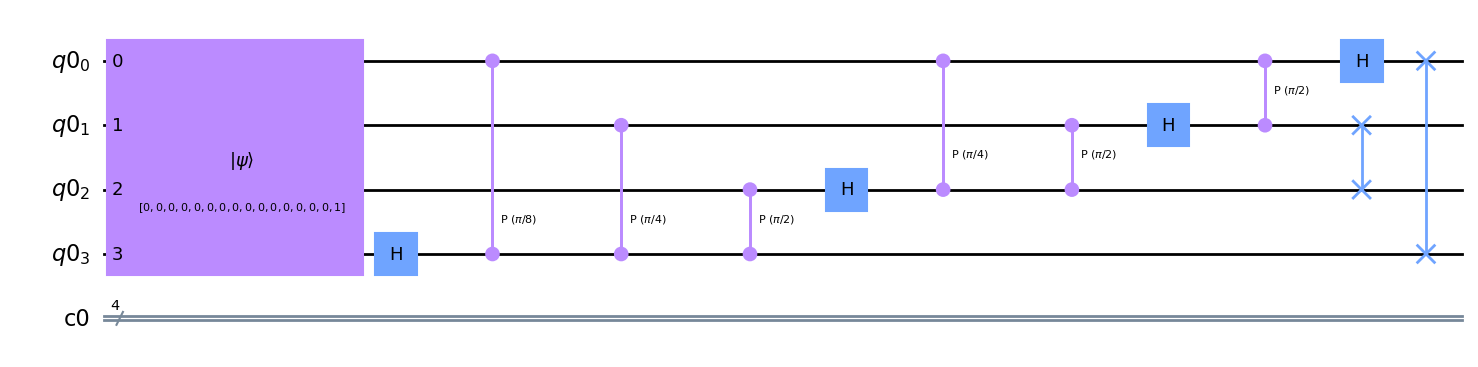

In [5]:
# Let's see how it looks:
qc = makeCirc(4, 0)
qft(qc,4)
qc.draw('mpl')

In [6]:
#QFT(ABCD) -> DCBA (swap) ABCD
# purpose of last two connections in circuit 

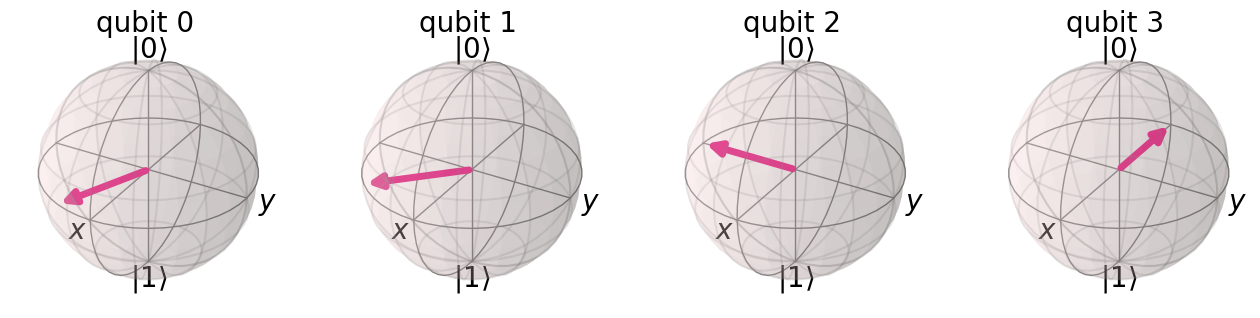

In [8]:
# all vectors point towards some multiple of a root of unity
getBloch(qc, backend)